# 🎯 Notebook 03: Logistic Regression Classification
## Intelligent Agriculture - Crop Recommendation System

**Objectives:**
1. Implement Binary Logistic Regression
2. Implement Multiclass Logistic Regression
3. Feature importance analysis
4. Model evaluation with classification metrics
5. Crop recommendation system

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Load preprocessed data
print("📊 LOADING PREPROCESSED DATA")
print("=" * 50)

train_data = pd.read_csv('../data/processed/train.csv')
val_data = pd.read_csv('../data/processed/validation.csv')
test_data = pd.read_csv('../data/processed/test.csv')

# Load preprocessing objects
scaler = joblib.load('../data/processed/scaler.pkl')
label_encoder = joblib.load('../data/processed/label_encoder.pkl')

print(f"✅ Data loaded: {len(train_data)} train, {len(val_data)} val, {len(test_data)} test")

# Prepare features and labels
feature_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X_train = train_data[feature_cols]
X_val = val_data[feature_cols]
X_test = test_data[feature_cols]
y_train = train_data['label']
y_val = val_data['label']
y_test = test_data['label']

# Scale features
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeature shape: {X_train_scaled.shape}")
print(f"Number of classes: {len(label_encoder.classes_)}")

📊 LOADING PREPROCESSED DATA
✅ Data loaded: 1540 train, 330 val, 330 test

Feature shape: (1540, 7)
Number of classes: 22


In [3]:
# Multiclass Logistic Regression
print("\n🎯 MULTICLASS LOGISTIC REGRESSION")
print("=" * 50)

# Train logistic regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_val_pred = lr_model.predict(X_val_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"\nAccuracy Scores:")
print(f"  Training: {train_acc:.4f}")
print(f"  Validation: {val_acc:.4f}")
print(f"  Test: {test_acc:.4f}")


🎯 MULTICLASS LOGISTIC REGRESSION

Accuracy Scores:
  Training: 0.9727
  Validation: 0.9758
  Test: 0.9758


In [4]:
# Classification Report
print("\n📊 CLASSIFICATION REPORT (Test Set)")
print("=" * 50)

print(classification_report(y_test, y_test_pred, 
                          target_names=label_encoder.classes_))


📊 CLASSIFICATION REPORT (Test Set)
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        15
      banana       1.00      1.00      1.00        15
   blackgram       0.94      1.00      0.97        15
    chickpea       1.00      1.00      1.00        15
     coconut       0.94      1.00      0.97        15
      coffee       1.00      1.00      1.00        15
      cotton       1.00      1.00      1.00        15
      grapes       1.00      1.00      1.00        15
        jute       0.88      1.00      0.94        15
 kidneybeans       1.00      1.00      1.00        15
      lentil       0.93      0.87      0.90        15
       maize       1.00      1.00      1.00        15
       mango       0.94      1.00      0.97        15
   mothbeans       0.93      0.87      0.90        15
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        15
      orange       1.00      0.93      0.97  


🔲 CONFUSION MATRIX


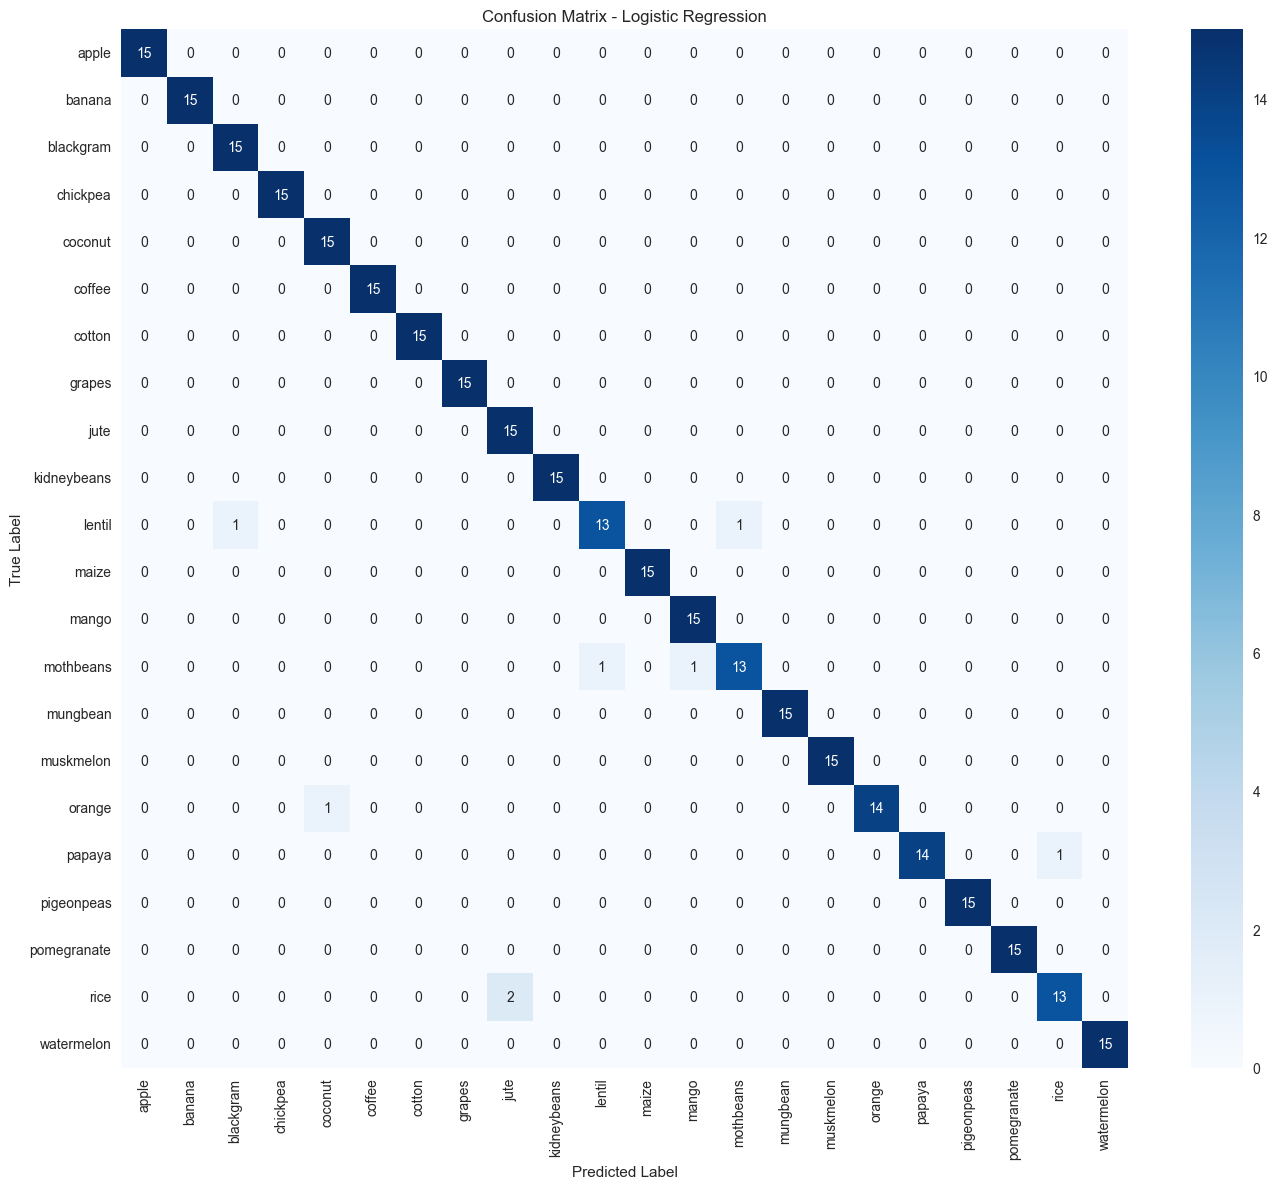

✅ Confusion matrix saved


In [5]:
# Confusion Matrix
print("\n🔲 CONFUSION MATRIX")
print("=" * 50)

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('../results/figures/03_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Confusion matrix saved")

In [6]:
# Save Model
print("\n💾 SAVING MODEL")
print("=" * 50)

joblib.dump(lr_model, '../models/saved_models/logistic_regression.pkl')

print("✅ Logistic Regression model saved")
print("\n" + "=" * 50)
print("✅ LOGISTIC REGRESSION ANALYSIS COMPLETE!")
print("=" * 50)


💾 SAVING MODEL
✅ Logistic Regression model saved

✅ LOGISTIC REGRESSION ANALYSIS COMPLETE!
